In [1]:
import pandas as pd


In [2]:
total_data=pd.read_csv("../data/interim/eda_data.csv")

In [53]:
total_data.columns

Index(['date_occ', 'time_occ', 'area_name', 'rpt_dist_no', 'crm_cd_desc',
       'mocodes', 'vict_age', 'vict_sex', 'vict_descent', 'premis_desc',
       'weapon_desc', 'status_desc', 'location', 'lat', 'lon'],
      dtype='object')

In [54]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590562 entries, 0 to 590561
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date_occ      590562 non-null  object 
 1   time_occ      590562 non-null  int64  
 2   area_name     590562 non-null  object 
 3   rpt_dist_no   590562 non-null  int64  
 4   crm_cd_desc   590562 non-null  object 
 5   mocodes       514175 non-null  object 
 6   vict_age      590562 non-null  int64  
 7   vict_sex      519974 non-null  object 
 8   vict_descent  519967 non-null  object 
 9   premis_desc   590263 non-null  object 
 10  weapon_desc   205378 non-null  object 
 11  status_desc   590562 non-null  object 
 12  location      590562 non-null  object 
 13  lat           590562 non-null  float64
 14  lon           590562 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage: 67.6+ MB


In [55]:
total_data.describe()

,time_occ,rpt_dist_no,vict_age,lat,lon
count,590562.000000,590562.000000,590562.000000,590562.000000,590562.000000
mean,1347.075112,961.271408,29.834043,34.011144,-118.143384
std,651.943265,609.708820,21.367869,1.402903,4.859462
min,1.000000,101.000000,-12.000000,0.000000,-118.766800
25%,900.000000,404.000000,15.000000,34.022800,-118.417000
50%,1427.000000,889.000000,30.000000,34.056500,-118.309000
75%,1900.000000,1454.000000,45.000000,34.141600,-118.266500
max,2359.000000,2198.000000,99.000000,34.676500,0.000000


In [56]:
duplicate_count = total_data.duplicated().sum()
duplicate_count

0

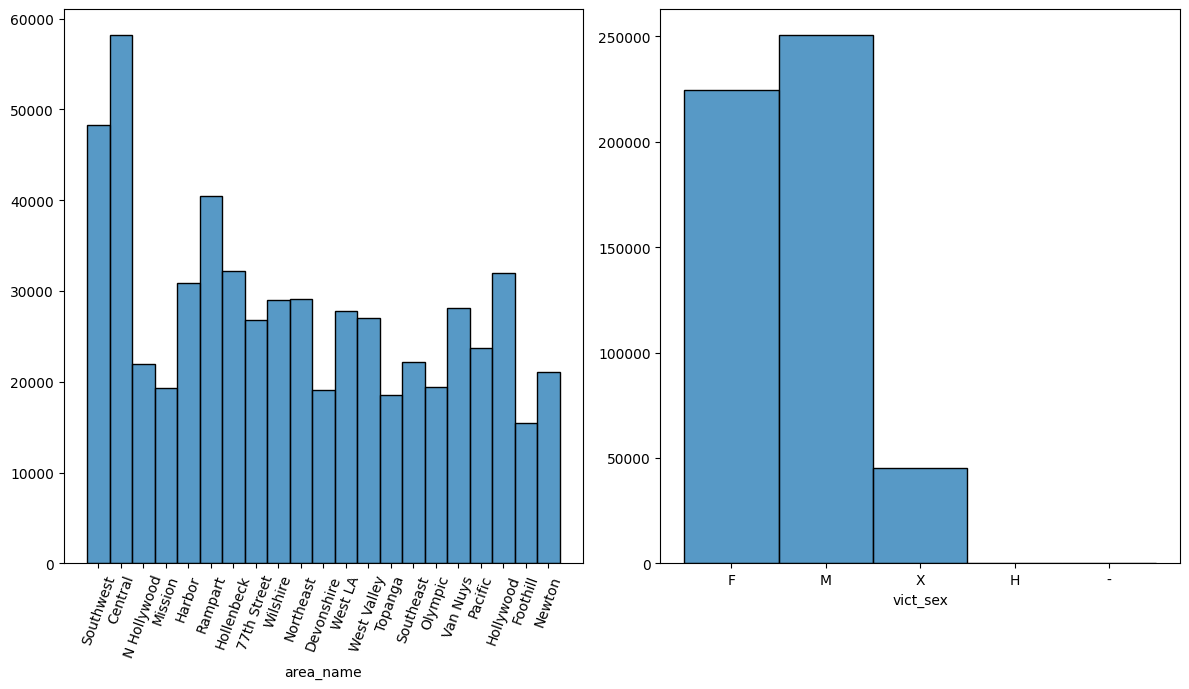

In [57]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1,2, figsize = (12, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "area_name").set(ylabel = None) 
axis[0].tick_params(axis='x', rotation=70)
#sns.boxplot(ax = axis[1, 0], data = total_data, x = "area_name")#.set(xlabel = None)
#axis[1,0].tick_params(axis='x', rotation=70)
sns.histplot(ax = axis[1], data = total_data, x = "vict_sex").set(ylabel = None)
#sns.boxplot(ax = axis[1, 1], data = total_data, x = "vict_sex")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [58]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590562 entries, 0 to 590561
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date_occ      590562 non-null  object 
 1   time_occ      590562 non-null  int64  
 2   area_name     590562 non-null  object 
 3   rpt_dist_no   590562 non-null  int64  
 4   crm_cd_desc   590562 non-null  object 
 5   mocodes       514175 non-null  object 
 6   vict_age      590562 non-null  int64  
 7   vict_sex      519974 non-null  object 
 8   vict_descent  519967 non-null  object 
 9   premis_desc   590263 non-null  object 
 10  weapon_desc   205378 non-null  object 
 11  status_desc   590562 non-null  object 
 12  location      590562 non-null  object 
 13  lat           590562 non-null  float64
 14  lon           590562 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage: 67.6+ MB


In [59]:
import datetime
total_data['date_occ'] = pd.to_datetime(total_data['date_occ']).dt.date
total_data["date_occ"] = pd.to_datetime(total_data["date_occ"])

In [60]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590562 entries, 0 to 590561
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      590562 non-null  datetime64[ns]
 1   time_occ      590562 non-null  int64         
 2   area_name     590562 non-null  object        
 3   rpt_dist_no   590562 non-null  int64         
 4   crm_cd_desc   590562 non-null  object        
 5   mocodes       514175 non-null  object        
 6   vict_age      590562 non-null  int64         
 7   vict_sex      519974 non-null  object        
 8   vict_descent  519967 non-null  object        
 9   premis_desc   590263 non-null  object        
 10  weapon_desc   205378 non-null  object        
 11  status_desc   590562 non-null  object        
 12  location      590562 non-null  object        
 13  lat           590562 non-null  float64       
 14  lon           590562 non-null  float64       
dtypes: datetime64[ns]

In [61]:
total_data = total_data[total_data['date_occ'].dt.year >= 2020]

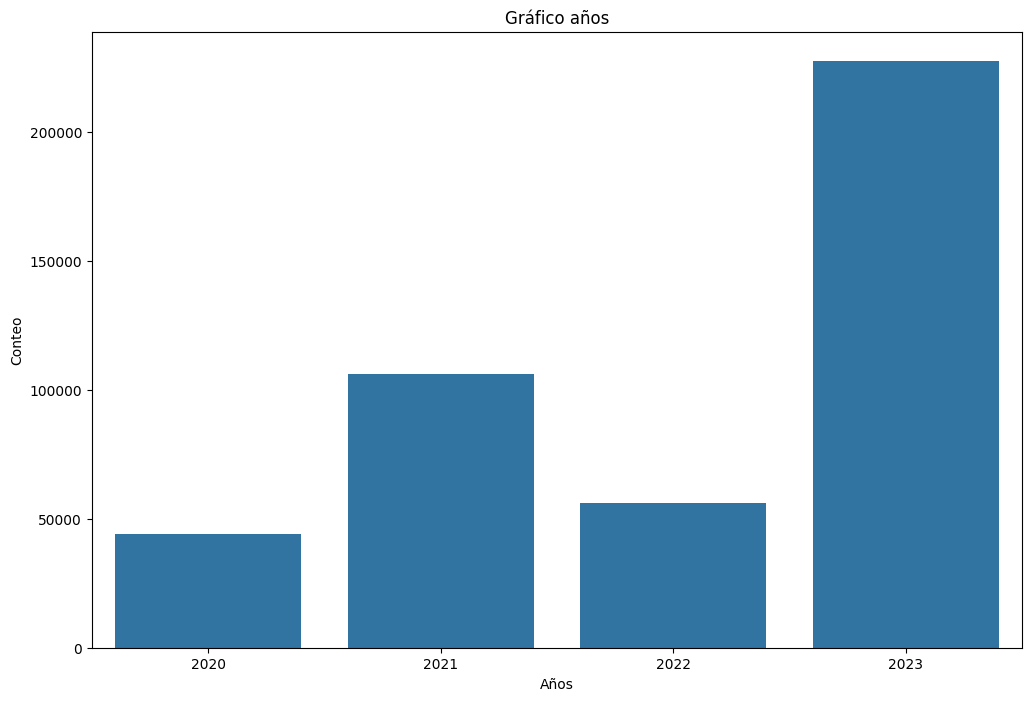

In [62]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=total_data["date_occ"].dt.year.value_counts().index, 
                 y=total_data["date_occ"].dt.year.value_counts())

# Configurar etiquetas y título
plt.xlabel('Años')
plt.ylabel('Conteo')
plt.title('Gráfico años')

# Mostrar el gráfico
plt.show()

In [63]:
delitos=total_data.value_counts("crm_cd_desc")#[0:20]
delitos=pd.DataFrame(delitos)
delitos.head(5)

,count
crm_cd_desc,
VEHICLE - STOLEN,45699
BATTERY - SIMPLE ASSAULT,37058
BURGLARY FROM VEHICLE,28205
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",27133
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25648


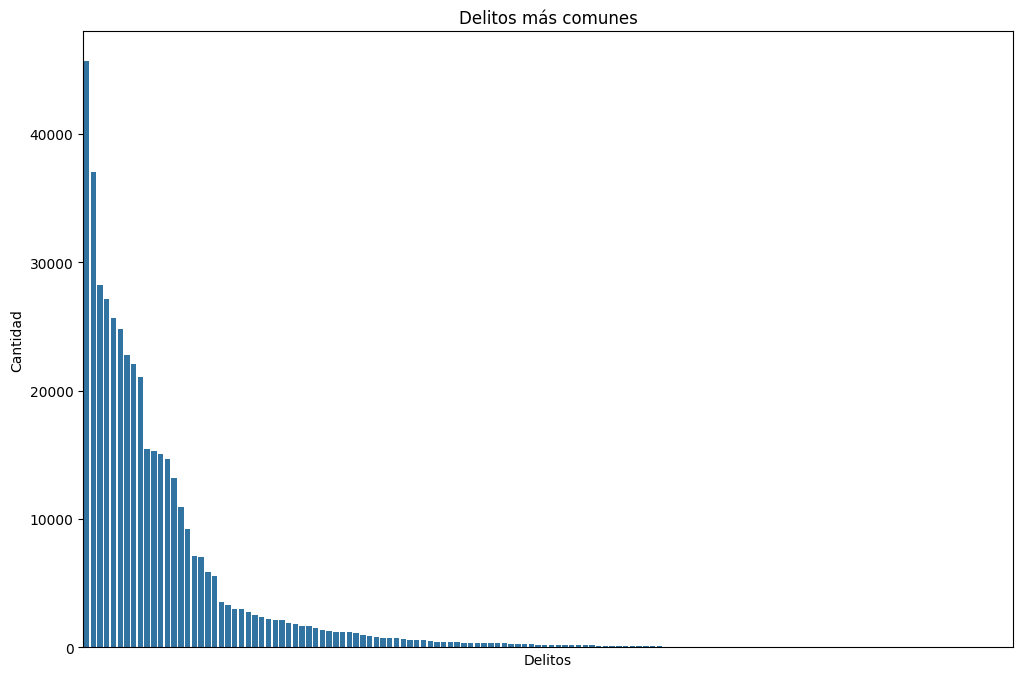

In [64]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=delitos.index, y=delitos['count'], data=delitos)
ax.set_xticks([])
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


# Configurar etiquetas y título
plt.xlabel('Delitos')
plt.ylabel('Cantidad')
plt.title('Delitos más comunes')

# Mostrar el gráfico
plt.show()

In [65]:
#total_data['time_occ'] = pd.to_datetime(total_data['time_occ'].astype(str).str.zfill(4), format='%H%M', errors='coerce').dt.time

In [68]:
total_data['time_occ']

0         2230
1          330
2         1200
3         1730
4          415
          ... 
590557    1908
590558    1800
590559    1230
590560       1
590561    2300
Name: time_occ, Length: 433936, dtype: int64

In [69]:
hours=total_data.value_counts("time_occ")#[0:20]
hours=pd.DataFrame(hours)
hours.head(5)

,count
time_occ,
1200,13222
1800,11334
1700,10576
2000,10425
1900,9730


In [70]:
hours=hours.sort_index()

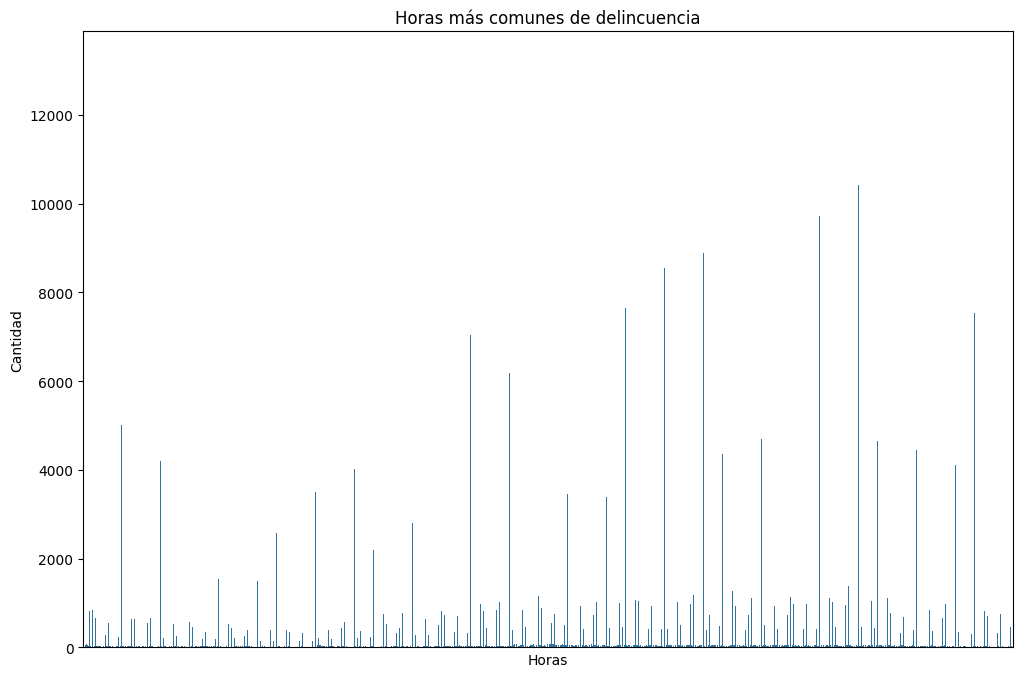

In [72]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=hours.index, y=hours['count'], data=hours)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xticks([])
# Configurar etiquetas y título
plt.xlabel('Horas')
plt.ylabel('Cantidad')
plt.title('Horas más comunes de delincuencia')

# Mostrar el gráfico
plt.show()

In [74]:
rpt_codes=total_data.value_counts("rpt_dist_no")#[0:20]
rpt_codes.head(5)

rpt_dist_no
162    4553
182    4015
111    3294
152    2607
153    2528
Name: count, dtype: int64

In [76]:
rpt_codes=pd.DataFrame(rpt_codes)
rpt_codes.head(5)

,count
rpt_dist_no,
162,4553
182,4015
111,3294
152,2607
153,2528


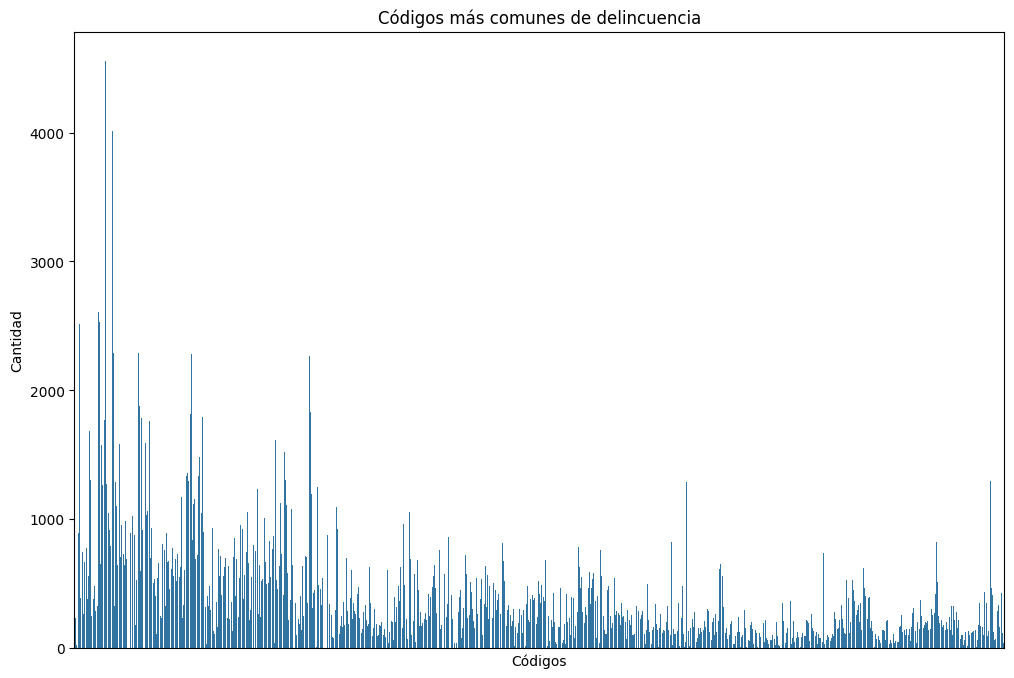

In [78]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=rpt_codes.index, y=rpt_codes['count'], data=rpt_codes)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xticks([])
# Configurar etiquetas y título
plt.xlabel('Códigos')
plt.ylabel('Cantidad')
plt.title('Códigos más comunes de delincuencia')

# Mostrar el gráfico
plt.show()

<Axes: xlabel='vict_age'>

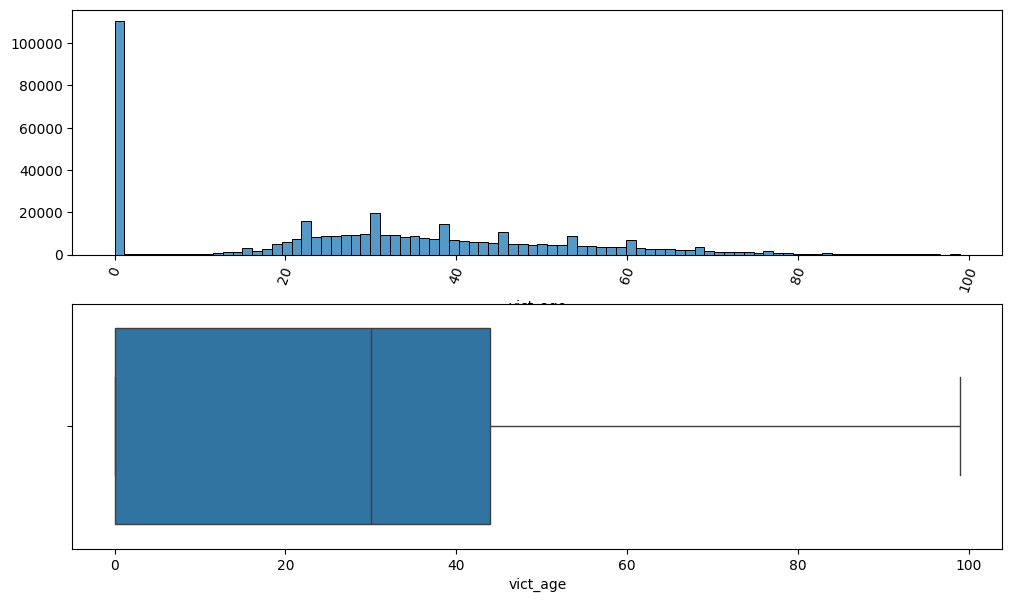

In [83]:
fig, axis = plt.subplots(2,1, figsize = (12, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "vict_age").set(ylabel = None) 
axis[0].tick_params(axis='x', rotation=70)
sns.boxplot(ax = axis[1], data = total_data, x = "vict_age")#.set(xlabel = None)

In [ ]:
total_data.iloc[80]

date_occ                             2020-01-01 00:00:00
time_occ                                        18:45:00
area_name                                        Central
rpt_dist_no                                          162
crm_cd_desc     SHOPLIFTING - PETTY THEFT ($950 & UNDER)
mocodes                                             0344
vict_age                                              20
vict_sex                                               F
vict_descent                                           H
premis_desc                             DEPARTMENT STORE
weapon_desc                                          NaN
status_desc                                  Invest Cont
location          700 W  7TH                          ST
lat                                               34.048
lon                                            -118.2577
Name: 80, dtype: object

<Axes: xlabel='date_occ'>

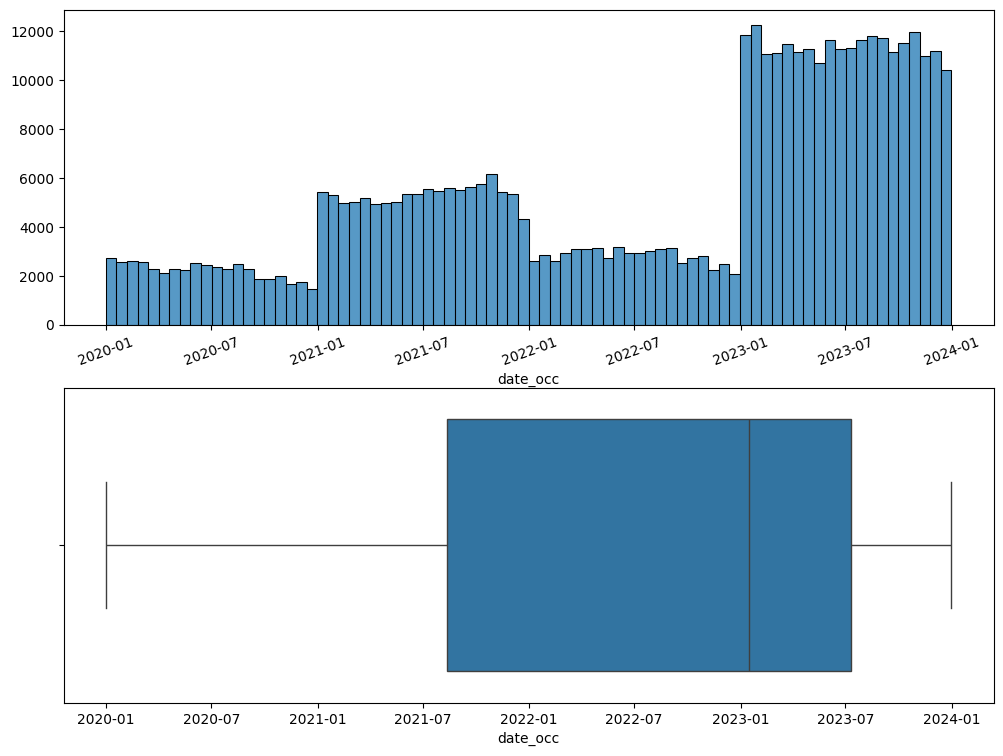

In [87]:
fig, axis = plt.subplots(2,1, figsize = (12, 9))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "date_occ").set(ylabel = None) 
axis[0].tick_params(axis='x', rotation=20)
sns.boxplot(ax = axis[1], data = total_data, x = "date_occ")#.set(xlabel = None)

In [84]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433936 entries, 0 to 590561
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      433936 non-null  datetime64[ns]
 1   time_occ      433936 non-null  int64         
 2   area_name     433936 non-null  object        
 3   rpt_dist_no   433936 non-null  int64         
 4   crm_cd_desc   433936 non-null  object        
 5   mocodes       374863 non-null  object        
 6   vict_age      433936 non-null  int64         
 7   vict_sex      377464 non-null  object        
 8   vict_descent  377461 non-null  object        
 9   premis_desc   433651 non-null  object        
 10  weapon_desc   154873 non-null  object        
 11  status_desc   433936 non-null  object        
 12  location      433936 non-null  object        
 13  lat           433936 non-null  float64       
 14  lon           433936 non-null  float64       
dtypes: datetime64[ns](1), 

In [90]:
descent=total_data.value_counts("vict_descent")#[0:20]
descent=pd.DataFrame(descent)
descent.head()

,count
vict_descent,
H,134294
W,82140
B,62356
X,48057
O,32126


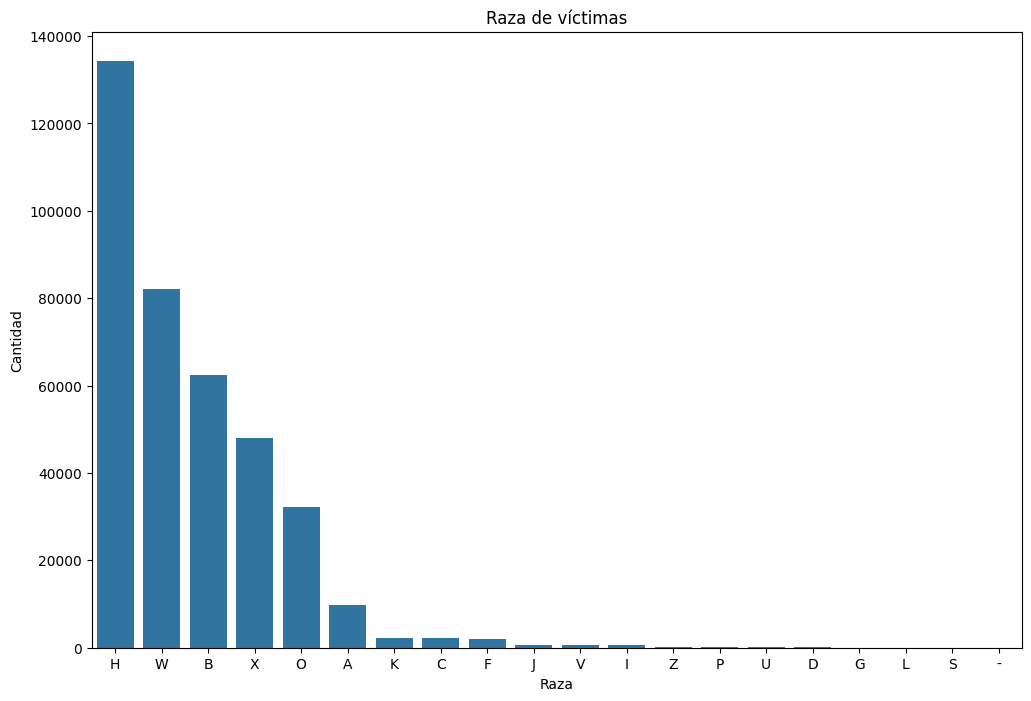

In [91]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=descent.index, y=descent['count'], data=descent)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Configurar etiquetas y título
plt.xlabel('Raza')
plt.ylabel('Cantidad')
plt.title('Raza de víctimas')

# Mostrar el gráfico
plt.show()

In [92]:
weapon_desc=total_data.value_counts("weapon_desc")
weapon_desc=pd.DataFrame(weapon_desc)
weapon_desc.head(20)

,count
weapon_desc,
"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",82492
UNKNOWN WEAPON/OTHER WEAPON,17574
VERBAL THREAT,11286
HAND GUN,9745
KNIFE WITH BLADE 6INCHES OR LESS,3371
OTHER KNIFE,3170
SEMI-AUTOMATIC PISTOL,2977
UNKNOWN FIREARM,2906
MACE/PEPPER SPRAY,1936


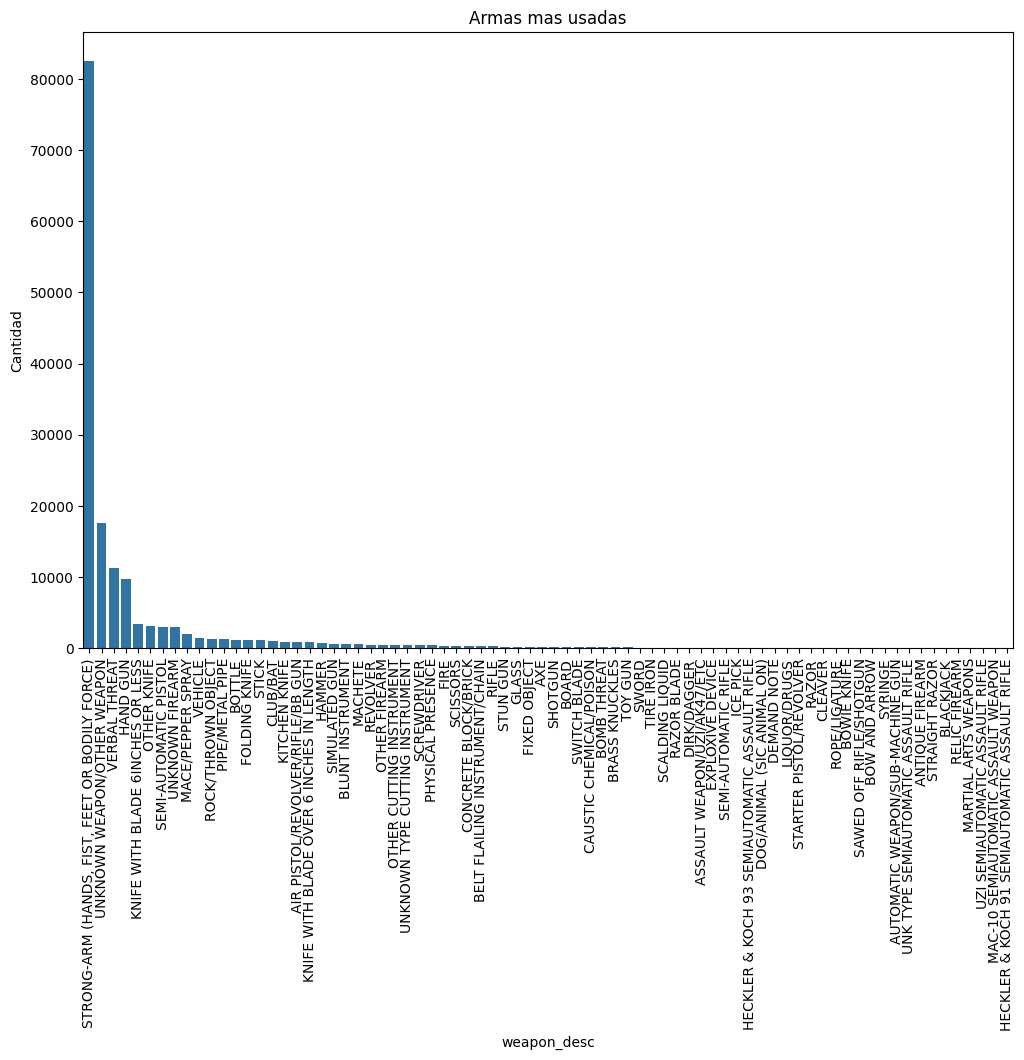

In [93]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=weapon_desc.index, y=weapon_desc['count'], data=weapon_desc)
plt.tick_params(axis = "x", labelrotation=90)

# Configurar etiquetas y título
plt.xlabel('weapon_desc')
plt.ylabel('Cantidad')
plt.title('Armas mas usadas')

# Mostrar el gráfico
plt.show()

In [97]:
is_weapon=total_data["weapon_desc"].isnull().value_counts()
is_weapon#.value_counts()

weapon_desc
True     279063
False    154873
Name: count, dtype: int64

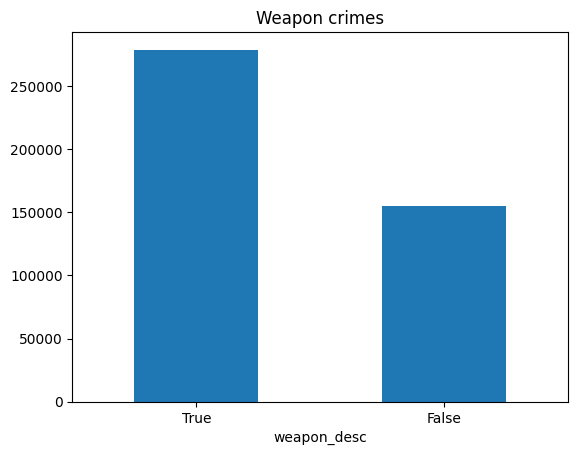

In [105]:
is_weapon.plot(kind='bar',rot=0, title='Weapon crimes')
plt.show()


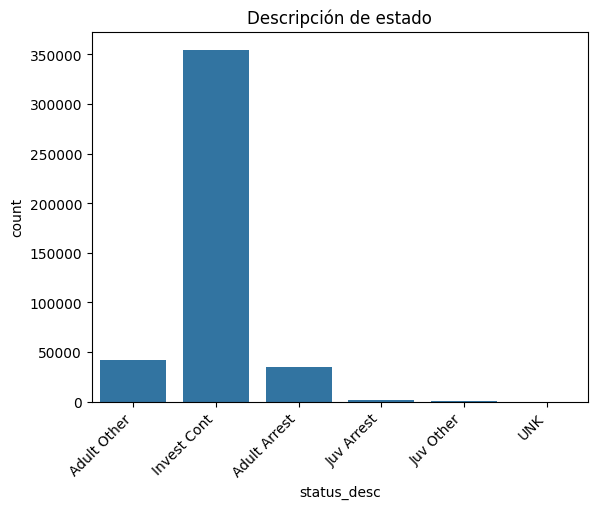

In [109]:
sns.countplot(x='status_desc', data=total_data)
plt.xticks(rotation=45, ha='right')
plt.title('Descripción de estado')
plt.show()

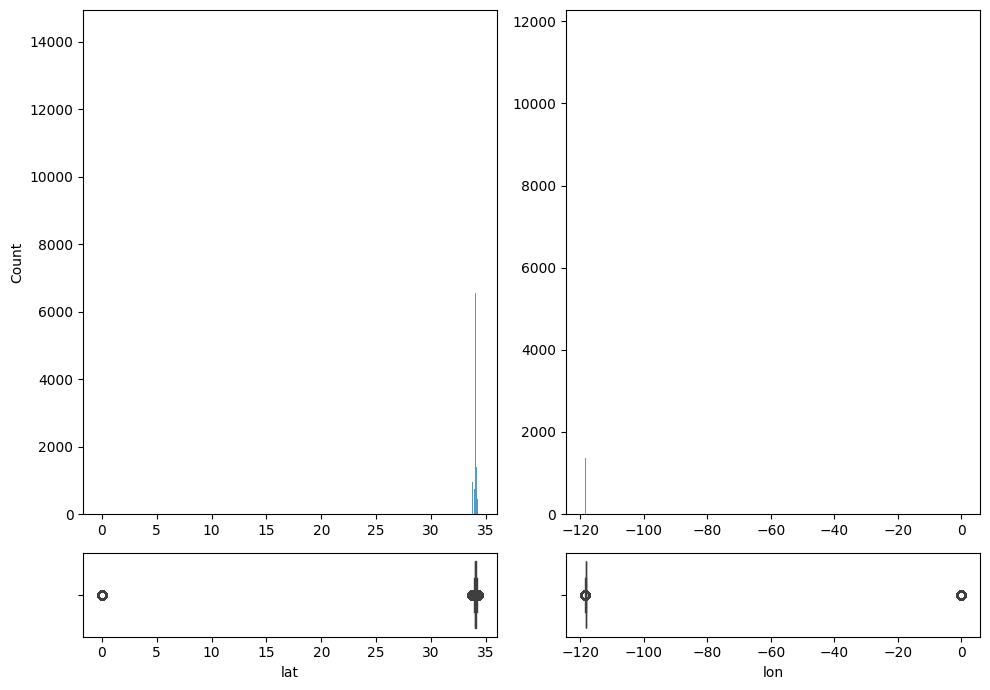

In [110]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "lat").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "lat")
sns.histplot(ax = axis[0, 1], data = total_data, x = "lon").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "lon")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [115]:
total_data["date_occ"]

0        2020-01-08
1        2020-01-01
2        2020-02-13
3        2020-01-01
4        2020-01-01
            ...    
590557   2023-11-09
590558   2023-12-19
590559   2023-07-08
590560   2023-07-01
590561   2023-11-09
Name: date_occ, Length: 433936, dtype: datetime64[ns]

In [122]:
columna_dia=total_data["date_occ"].apply(lambda x:x.strftime("%A"))
columna_dia

0         Wednesday
1         Wednesday
2          Thursday
3         Wednesday
4         Wednesday
            ...    
590557     Thursday
590558      Tuesday
590559     Saturday
590560     Saturday
590561     Thursday
Name: date_occ, Length: 433936, dtype: object

In [13]:
mocodes=total_data['mocodes'].str.split(" ")

In [18]:
mocodes.head()

0          [0444, 0913]
1    [0416, 1822, 1414]
2                [1501]
3          [0329, 1402]
4                [0329]
Name: mocodes, dtype: object

In [16]:
frecuencias = mocodes.apply(pd.Series).stack().value_counts()

In [27]:
frecuencias[:5]

0344    181816
1822    178045
0913     79795
0329     79081
0416     76722
Name: count, dtype: int64

In [20]:
# cosa=mocodes.apply(pd.Series).stack()


In [38]:
# cosa.head()#.value_counts()

0  0    0444
   1    0913
1  0    0416
   1    1822
   2    1414
dtype: object

In [39]:
# total_data.iloc[1]

date_occ                                    2020-01-01
time_occ                                           330
area_name                                      Central
rpt_dist_no                                        163
crm_cd_desc                   BATTERY - SIMPLE ASSAULT
mocodes                                 0416 1822 1414
vict_age                                            25
vict_sex                                             M
vict_descent                                         H
premis_desc                                   SIDEWALK
weapon_desc                UNKNOWN WEAPON/OTHER WEAPON
status_desc                                Invest Cont
location        700 S  HILL                         ST
lat                                            34.0459
lon                                          -118.2545
Name: 1, dtype: object